In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import unit_norm
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras import applications
from tensorflow.keras.models import Model
from tensorflow.image import rgb_to_grayscale

/home/stevevn/anaconda3/envs/pytorch/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/stevevn/anaconda3/envs/pytorch/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/stevevn/anaconda3/envs/pytorch/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/stevevn/anaco

In [ ]:
cat = 'mmm'

In [ ]:
df = pd.read_csv(f'{cat}_attr.csv')
df = df.drop(df.columns[1:5], axis = 1).fillna(0)
df

,image_name,mini,midi,maxi
0,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
1,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
2,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
3,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
4,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
...,...,...,...,...
8180,img/Chiffon-Paneled_Maxi_Dress/img_00000024.jpg,0.0,0.0,1.0
8181,img/Crocheted_Gauze_Maxi_Dress/img_00000020.jpg,0.0,0.0,1.0
8182,img/Dainty_A-Line_Dress/img_00000074.jpg,0.0,0.0,1.0
8183,img/Butterfly_Print_Maxi_Dress/img_00000066.jpg,0.0,0.0,1.0


In [ ]:
all_array = np.load(f'{cat}_array.npz', allow_pickle=True)['arr_0']
all_array = np.array([x.numpy() / 255 for x in all_array]) #color
# all_array = np.array([rgb_to_grayscale(x.numpy()) / 255 for x in all_array]) #grayscale

all_array

2022-05-24 01:35:24.037114: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 01:35:24.065591: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 01:35:24.066061: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 01:35:24.067699: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_array, df.drop('image_name', axis=1), random_state=1, test_size=0.2)

In [ ]:
import keras
from tensorflow.keras.applications import VGG19, VGG16, ResNet50
#from tensorflow.keras.applications.vgg19 import preprocess_input
#from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.layers import Dense, Dropout
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
# Create the base model of VGG19
#vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (100, 100, 3), classes = y_train.shape[1])
#vgg_16 = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3), classes = y_train.shape[1])

In [ ]:
# Freeze all the layers
for layer in resnet50.layers[:]:
    layer.trainable = False

In [ ]:
# Preprocessing the input 
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [ ]:
resnet_model = Sequential()
resnet_model.add(resnet50)
resnet_model.add(Flatten())
#resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

In [ ]:
resnet_model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics=['accuracy'])

In [ ]:
batch_size = 64
epochs = 150

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, min_delta = 0.05, verbose = 1)

history_self = resnet_model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=[early_stopping],
          validation_data=(X_test, y_test))

Epoch 1/150
103/103 [==============================] - 14s 75ms/step - loss: 1.0914 - accuracy: 0.4033 - val_loss: 1.0435 - val_accuracy: 0.4826
Epoch 2/150
103/103 [==============================] - 5s 48ms/step - loss: 1.0488 - accuracy: 0.4620 - val_loss: 1.0198 - val_accuracy: 0.4954
Epoch 3/150
103/103 [==============================] - 5s 48ms/step - loss: 1.0014 - accuracy: 0.5191 - val_loss: 0.9793 - val_accuracy: 0.5339
Epoch 4/150
103/103 [==============================] - 5s 47ms/step - loss: 0.9796 - accuracy: 0.5362 - val_loss: 0.9650 - val_accuracy: 0.5400
Epoch 5/150
103/103 [==============================] - 5s 49ms/step - loss: 0.9663 - accuracy: 0.5389 - val_loss: 0.9548 - val_accuracy: 0.5412
Epoch 6/150
103/103 [==============================] - 5s 48ms/step - loss: 0.9538 - accuracy: 0.5443 - val_loss: 0.9745 - val_accuracy: 0.5162
Epoch 7/150
103/103 [==============================] - 5s 48ms/step - loss: 0.9432 - accuracy: 0.5570 - val_loss: 1.0052 - val_accuracy

Text(0.5, 1.0, 'Loss Curves')

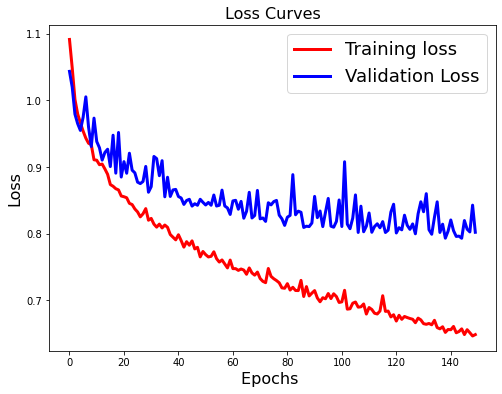

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history_self.history['loss'],'r',linewidth=3.0)
plt.plot(history_self.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

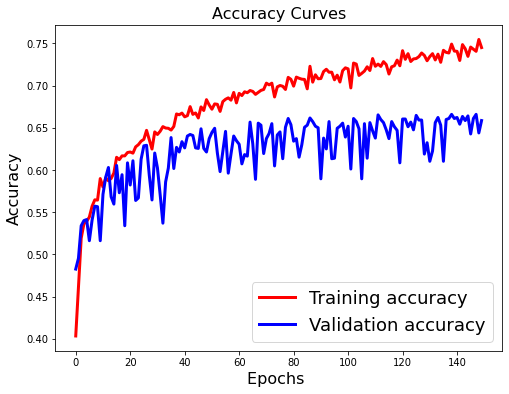

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history_self.history['accuracy'],'r',linewidth=3.0)
plt.plot(history_self.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

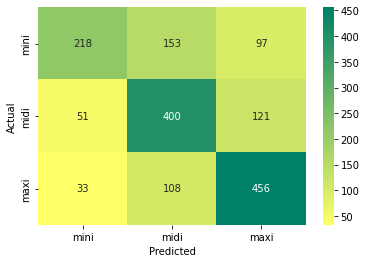

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(resnet_model.predict(X_test), axis = 1)

y_test_label = np.argmax(y_test.to_numpy(), axis = 1)

matrix = confusion_matrix(y_test_label, y_pred)
ticks = ['mini','midi','maxi']
sns.heatmap(matrix, annot=True, fmt='g', xticklabels=ticks, yticklabels=ticks, cmap='summer_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
wrong_pred = y_test[y_pred != y_test_label]
wrong_pred

,mini,midi,maxi
7379,0.0,0.0,1.0
39,1.0,0.0,0.0
3391,0.0,1.0,0.0
473,1.0,0.0,0.0
1750,1.0,0.0,0.0
...,...,...,...
79,1.0,0.0,0.0
6378,0.0,0.0,1.0
4515,0.0,1.0,0.0
596,1.0,0.0,0.0
